In [5]:
import os
import numpy as np
import cv2
import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset
from patchify import patchify
import torch
from torch.utils.data import DataLoader
import torch.nn as nn

import os
import time
from glob import glob


In [123]:
class DriveDataset(Dataset):
    def __init__(self, images_path, masks_path):

        self.images_path = images_path
        self.masks_path = masks_path
        self.n_samples = len(images_path)

    def __getitem__(self, index):
        """ Reading image """
        image = cv2.imread(self.images_path[index], cv2.IMREAD_COLOR)
        image = image.astype(np.float32)
        image = torch.from_numpy(image)

        """ Reading mask """
        mask = cv2.imread(self.masks_path[index], cv2.IMREAD_GRAYSCALE)
        mask = mask.astype(np.float32)
        mask = torch.from_numpy(mask)
        return image, mask

    def __len__(self):
        return self.n_samples

In [124]:
x = "D:\projects\segmentation of aerial imagery\data\org_data\image"
y = "D:\projects\segmentation of aerial imagery\data\org_data\mask"

In [125]:
len(DriveDataset(x,y))


62

In [36]:
a=int('3C', 16)  #3C with base 16. Should return 60. 
print(a)
#Do the same for all RGB channels in each hex code to convert to RGB
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155

60


In [39]:
label = rgb_to_2D_label(mask)   


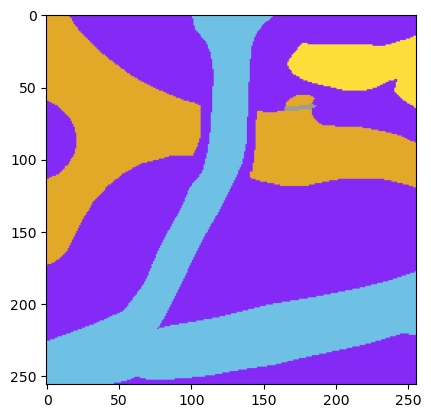

In [40]:
plt.imshow(mask, cmap='gray')

In [135]:
def load_data(path):
    X= sorted(glob(os.path.join(path, "image", "*.png")))
    Y = sorted(glob(os.path.join(path, "mask", "*.png")))
    return (X, Y)

In [136]:
images, masks = load_data("D:\projects\segmentation of aerial imagery\data\org_data")

In [137]:
images, masks

(['D:\\projects\\segmentation of aerial imagery\\data\\org_data\\image\\image_part_009_0.png',
  'D:\\projects\\segmentation of aerial imagery\\data\\org_data\\image\\image_part_009_1.png',
  'D:\\projects\\segmentation of aerial imagery\\data\\org_data\\image\\image_part_009_10.png',
  'D:\\projects\\segmentation of aerial imagery\\data\\org_data\\image\\image_part_009_100.png',
  'D:\\projects\\segmentation of aerial imagery\\data\\org_data\\image\\image_part_009_1000.png',
  'D:\\projects\\segmentation of aerial imagery\\data\\org_data\\image\\image_part_009_1001.png',
  'D:\\projects\\segmentation of aerial imagery\\data\\org_data\\image\\image_part_009_1002.png',
  'D:\\projects\\segmentation of aerial imagery\\data\\org_data\\image\\image_part_009_1003.png',
  'D:\\projects\\segmentation of aerial imagery\\data\\org_data\\image\\image_part_009_1004.png',
  'D:\\projects\\segmentation of aerial imagery\\data\\org_data\\image\\image_part_009_1005.png',
  'D:\\projects\\segmentation

In [138]:
from tqdm import tqdm
imagess=[]
maskss=[]
for idx, (X, Y) in tqdm(enumerate(zip(images, masks)), total=len(images)):
    i = cv2.imread(X)
    i = np.array(i)
    i = torch.from_numpy(i)
    imagess.append(i)
    
    m = cv2.imread(Y)
    m = np.array(m)
    m = torch.from_numpy(m)
    maskss.append(m)
    

100%|██████████| 1305/1305 [00:03<00:00, 328.76it/s]


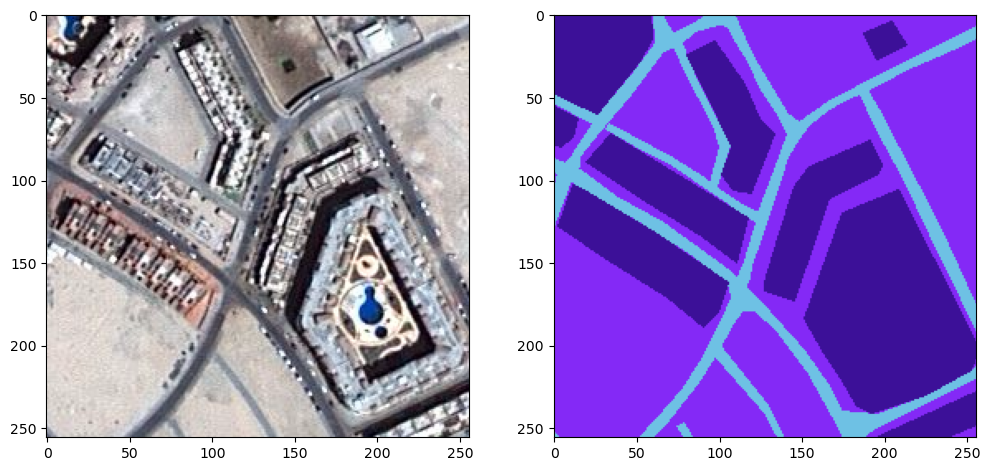

In [139]:
import random
import numpy as np
image_number = random.randint(0, len(imagess))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow((imagess[image_number]))
plt.subplot(122)
plt.imshow((maskss[image_number]))
plt.show()

In [140]:
imagess = np.array(imagess)
maskss =  np.array(maskss)

In [141]:
labels = []
for i in range(maskss.shape[0]):
    label = rgb_to_2D_label(maskss[i])
    labels.append(label)    

labels = np.array(labels)   
labels = np.expand_dims(labels, axis=3)

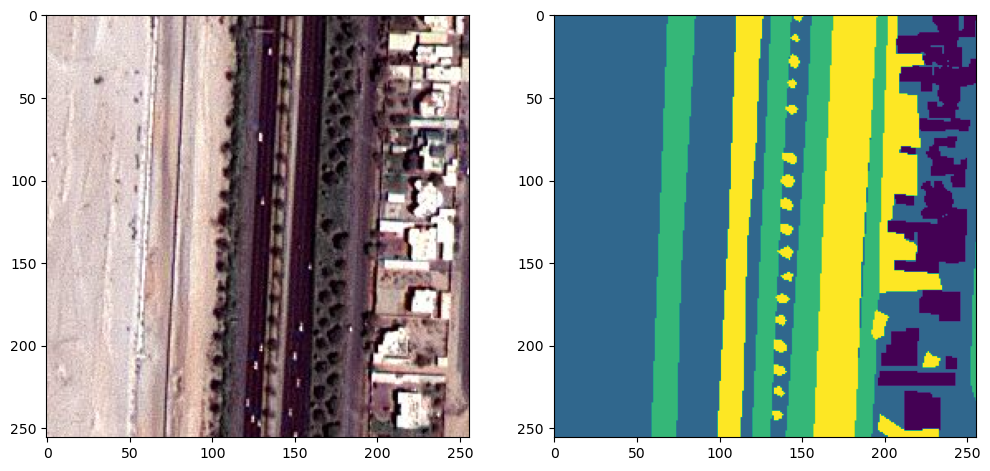

In [142]:
import random
import numpy as np
image_number = random.randint(0, len(imagess))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow((imagess[image_number]))
plt.subplot(122)
plt.imshow((labels[image_number]))
plt.show()

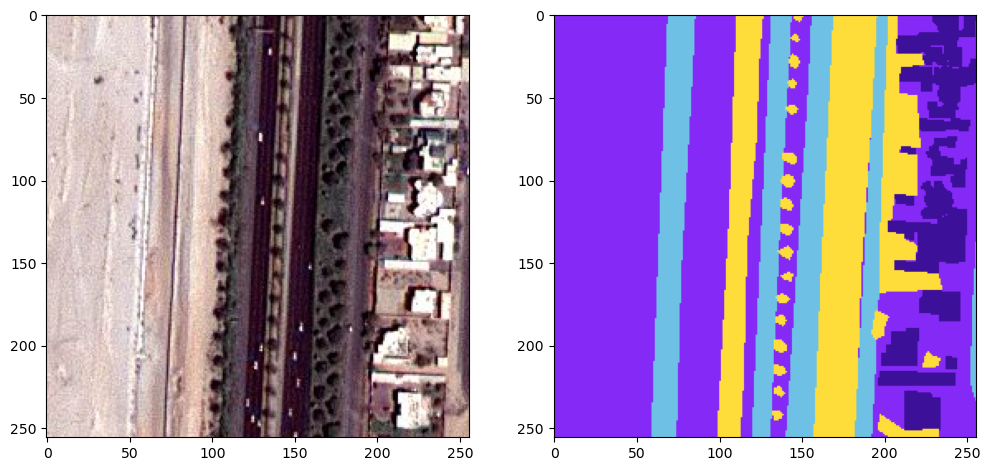

In [143]:
import random
import numpy as np
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow((imagess[image_number]))
plt.subplot(122)
plt.imshow((maskss[image_number]))
plt.show()

In [144]:
n_classes = len(np.unique(labels))

In [145]:
n_classes

6

In [149]:
def to_categorical(y, num_classes):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]
labels_cat = to_categorical(labels, num_classes=n_classes)

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imagess, labels_cat, test_size = 0.20, random_state = 42)

In [160]:
def from_categorical(one_hot_encoded):
    """ Converts a binary class matrix back to class vector """
    return np.argmax(one_hot_encoded, axis=1)

In [161]:
l=from_categorical(y_train[0])

TypeError: Invalid shape (256, 1, 6) for image data

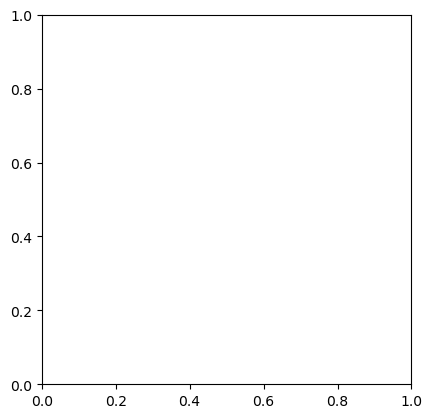

In [163]:
plt.imshow(l)

In [14]:
from models.dataloader import Aerial
datadir=r'D:\projects\segmentation of aerial imagery\data\org_data'
dataset=Aerial(datadir)
len(dataset)

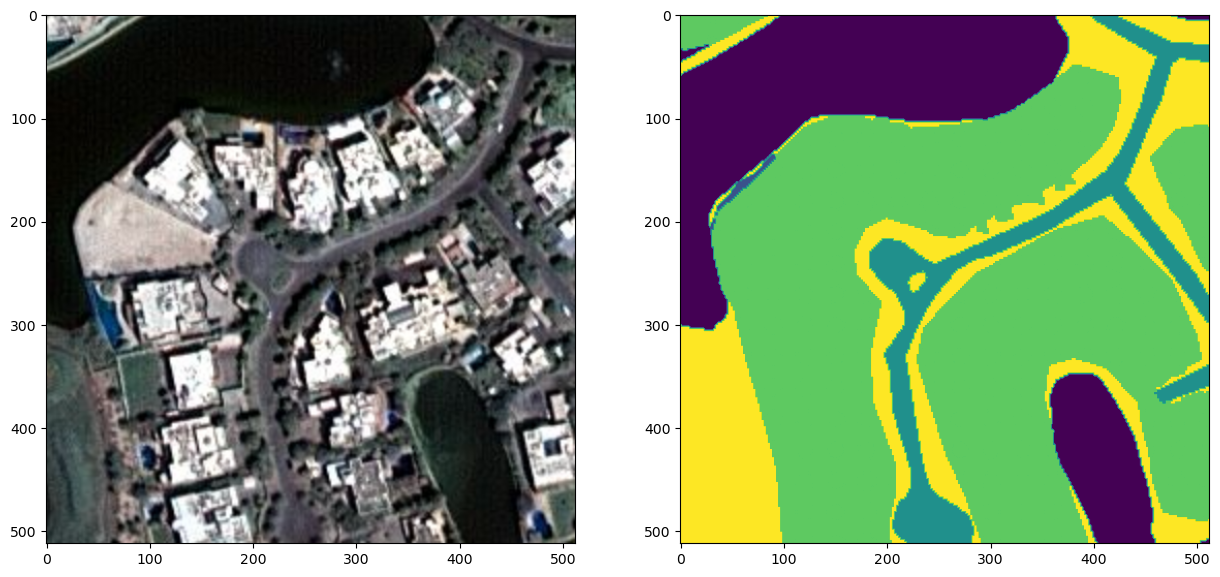

In [17]:
d = dataset[100] ## __getitem__ is called
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(np.moveaxis(d[0].numpy(),0,-1))
plt.subplot(1,2,2)
plt.imshow(d[1])

In [464]:
test_num = int(0.25 * len(dataset))
print(f'test data : {test_num}')
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [len(dataset)-test_num, test_num], generator=torch.Generator().manual_seed(101))

BACH_SIZE = 4
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=BACH_SIZE, shuffle=True, num_workers=0)

test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=BACH_SIZE, shuffle=False, num_workers=0)

test data : 326


In [465]:

def get_default_device():
    # pick the gpu if available
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data,device):
    #move tensors to choosen device
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking = True)


class DeviceDataLoader():
    # move the batches of the data to our selected device
    def __init__(self,dl,device):
        self.dl = dl
        self.device = device
    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)
    def __len__(self):
        return len(self.dl)

device = get_default_device()

train_dataloader = DeviceDataLoader(train_dataloader, device)
test_dataloader = DeviceDataLoader(test_dataloader, device)


In [466]:
torch.cuda.is_available()

True

In [473]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)
    
    
    
class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)
    
    
    
    
class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels , in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)


    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        # if you have padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)
    
    
class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

In [474]:
class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down(512, 1024 // factor)
        self.up1 = Up(1024, 512 // factor, bilinear)
        self.up2 = Up(512, 256 // factor, bilinear)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

In [475]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class FocalLoss(nn.Module):
    def __init__(self, gamma=0, alpha=None, size_average=True):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        if isinstance(alpha,(float,int)): self.alpha = torch.Tensor([alpha,1-alpha])
        if isinstance(alpha,list): self.alpha = torch.Tensor(alpha)
        self.size_average = size_average

    def forward(self, input, target):
        if input.dim()>2:
            input = input.view(input.size(0),input.size(1),-1)  # N,C,H,W => N,C,H*W
            input = input.transpose(1,2)    # N,C,H*W => N,H*W,C
            input = input.contiguous().view(-1,input.size(2))   # N,H*W,C => N*H*W,C
        target = target.view(-1,1)

        logpt = F.log_softmax(input, dim=-1)
        logpt = logpt.gather(1,target)
        logpt = logpt.view(-1)
        pt = Variable(logpt.data.exp())

        if self.alpha is not None:
            if self.alpha.type()!=input.data.type():
                self.alpha = self.alpha.type_as(input.data)
            at = self.alpha.gather(0,target.data.view(-1))
            logpt = logpt * Variable(at)

        loss = -1 * (1-pt)**self.gamma * logpt
        if self.size_average: return loss.mean()
        else: return loss.sum()

In [476]:
criterion = FocalLoss(gamma=3/4).to(device)

In [18]:
def acc(label, predicted):
    seg_acc = (label.cpu() == torch.argmax(predicted, axis=1).cpu()).sum() / torch.numel(y.cpu())
    return seg_acc

In [478]:
min_loss = torch.tensor(float('inf'))

model = to_device(UNet(n_channels=3, n_classes=6, bilinear=True),device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.5)

In [479]:
os.makedirs('./saved_models', exist_ok=True)

N_EPOCHS = 50
N_DATA = len(train_dataset)
N_TEST = len(test_dataset)

plot_losses = []
scheduler_counter = 0

In [480]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
pytorch_total_params

17267718

In [ ]:
for epoch in range(N_EPOCHS):
  # training
  model.train()
  loss_list = []
  acc_list = []
  for batch_i, (x, y) in enumerate(train_dataloader):
      pred_mask = model(x)  #[4,6,512,512]
      loss = criterion(pred_mask, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      loss_list.append(loss.cpu().detach().numpy())
      acc_list.append(acc(y,pred_mask).numpy())

      sys.stdout.write(
          "\r[Epoch %d/%d] [Batch %d/%d] [Loss: %f (%f)]"
          % (
              epoch,
              N_EPOCHS,
              batch_i,
              len(train_dataloader),
              loss.cpu().detach().numpy(),
              np.mean(loss_list),
          )
      )
  scheduler_counter += 1
  # testing
  model.eval()
  val_loss_list = []
  val_acc_list = []
  for batch_i, (x, y) in enumerate(test_dataloader):
      with torch.no_grad():    
          pred_mask = model(x)  
      val_loss = criterion(pred_mask, y)
      val_loss_list.append(val_loss.cpu().detach().numpy())
      val_acc_list.append(acc(y,pred_mask).numpy())
      
      
  print(' epoch {} - loss : {:.5f} - acc : {:.2f} - val loss : {:.5f} - val acc : {:.2f}'.format(epoch, 
                                                                                                 np.mean(loss_list), 
                                                                                                 np.mean(acc_list), 
                                                                                                 np.mean(val_loss_list),
                                                                                                 np.mean(val_acc_list)))
  plot_losses.append([epoch, np.mean(loss_list), np.mean(val_loss_list)])

  compare_loss = np.mean(val_loss_list)
  is_best = compare_loss < min_loss
  if is_best == True:
    scheduler_counter = 0
    min_loss = min(compare_loss, min_loss)
    torch.save(model.state_dict(), './saved_models/unet_epoch_{}_{:.5f}.pt'.format(epoch,np.mean(val_loss_list)))
  
  if scheduler_counter > 5:
    lr_scheduler.step()
    print(f"lowering learning rate to {optimizer.param_groups[0]['lr']}")
    scheduler_counter = 0

[Epoch 0/50] [Batch 244/245] [Loss: 0.406189 (0.708620)] epoch 0 - loss : 0.70862 - acc : 0.70 - val loss : 0.80969 - val acc : 0.63
[Epoch 1/50] [Batch 212/245] [Loss: 0.866536 (0.614675)]